# Data Acquisition

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import warnings
import numpy as np
import seaborn as sb
warnings.filterwarnings("ignore")

c:\program files (x86)\python35-32\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  return f(*args, **kwds)


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

# Data Exploration, Cleaning


In [7]:
train_x = train[["Pclass", "Sex", "Age", "SibSp", "Fare", "Parch"]]
train_y = train[["Survived"]]
test_x = test

In [8]:
train_x.head()

,Pclass,Sex,Age,SibSp,Fare,Parch
0,3,male,22.0,1,7.2500,0
1,1,female,38.0,1,71.2833,0
2,3,female,26.0,0,7.9250,0
3,1,female,35.0,1,53.1000,0
4,3,male,35.0,0,8.0500,0


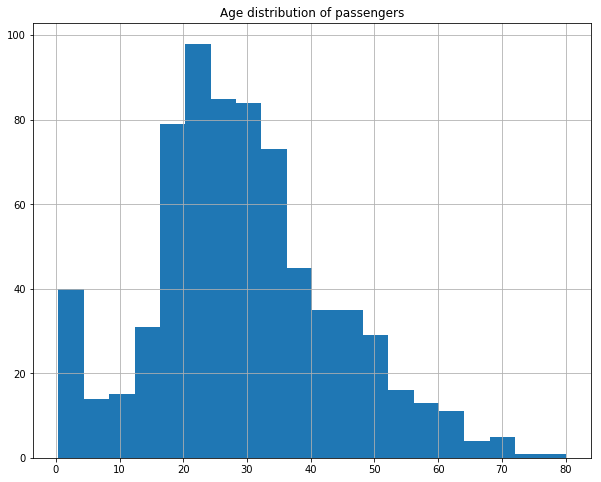

In [9]:
plt.figure(figsize = (10,8))
train_x['Age'].hist(bins=20)
plt.title("Age distribution of passengers")
plt.show()

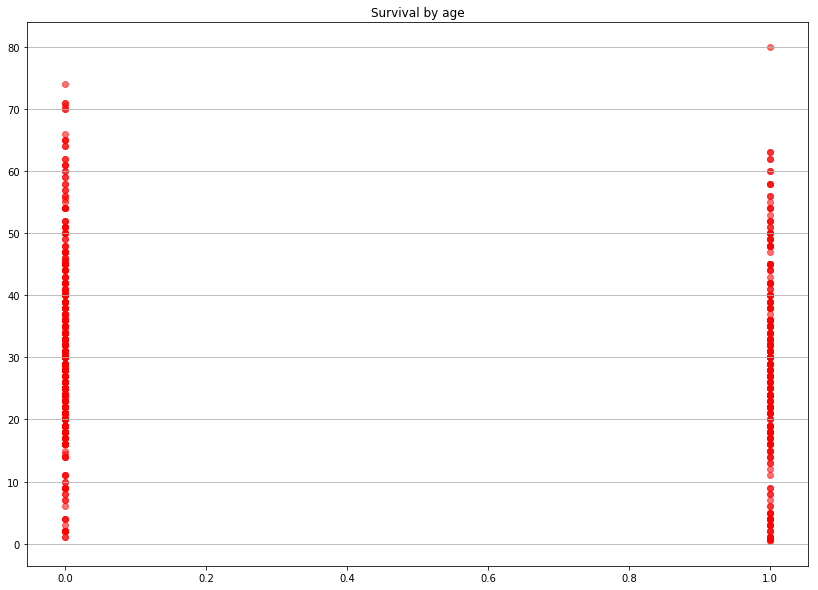

In [10]:
plt.figure(figsize=(14,10))
plt.scatter(train_y, train_x["Age"], alpha = .55, color = 'red')
plt.grid(b=True,which="major", axis = "y")
plt.title("Survival by age")
plt.show()

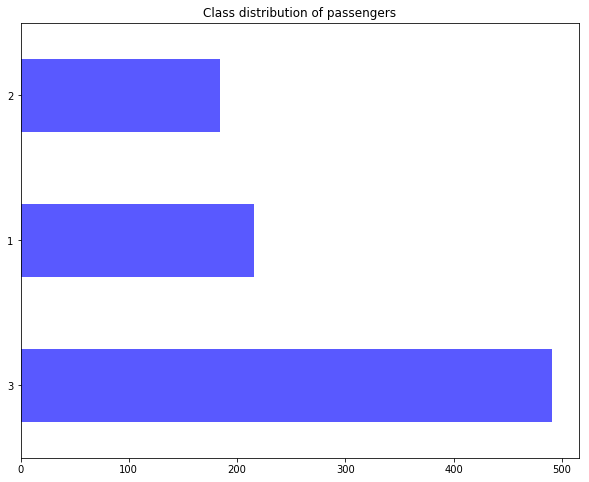

In [11]:
plt.figure(figsize = (10,8))
train_x['Pclass'].value_counts().plot(kind = "barh", color = "blue", alpha = .65)
plt.title("Class distribution of passengers")
plt.show()

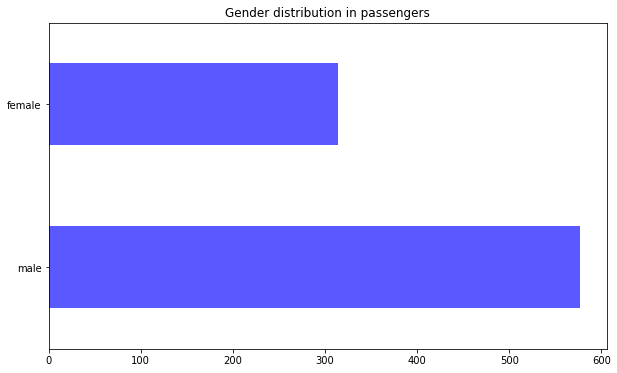

In [12]:
plt.figure(figsize = (10,6))
train_x['Sex'].value_counts().plot(kind='barh', color='blue', alpha = .65)
plt.title("Gender distribution in passengers")
plt.show()

# PCA + Label Encoding

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [14]:
#print (np.isnan(train_x))
train_x['Age'] = train_x['Age'].fillna(train_x['Age'].mean())
train_x['Fare'] = train_x['Fare'].fillna(train_x['Fare'].mean())

test_x['Age'] = test_x['Age'].fillna(test_x['Age'].mean())
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].mean())

In [15]:
le = LabelEncoder()
train_x['Sex'] = le.fit_transform(train_x['Sex'])

le2 = LabelEncoder()
test_x['Sex'] = le2.fit_transform(test_x['Sex'])

In [16]:
pca = PCA(n_components=2)
pca.fit_transform(train_x)

#plt.plot(pca.explained_variance_ratio_)

array([[-25.14906286,  -7.06745981],
       [ 39.29086928,   7.30459431],
       [-24.37330512,  -3.070451  ],
       ...,
       [ -8.74878842,   0.17963968],
       [ -2.29004419,  -3.598455  ],
       [-24.39581726,   2.93298603]])

In [17]:
# Preparing test
test_x = test_x[["Pclass", "Sex", "Age", "SibSp", "Fare", "Parch"]]
pca.transform(test_x)

array([[-2.42524116e+01,  5.42892362e+00],
       [-2.47548560e+01,  1.79149268e+01],
       [-2.16789564e+01,  3.28768876e+01],
       [-2.36121430e+01, -2.08643841e+00],
       [-2.01082797e+01, -7.21346442e+00],
       [-2.33838894e+01, -1.50903791e+01],
       [-2.45662126e+01,  9.33918602e-01],
       [-3.29194053e+00, -3.62480022e+00],
       [-2.52743921e+01, -1.10460714e+01],
       [-8.27779044e+00, -8.52281667e+00],
       [-2.42944586e+01,  1.20322482e+00],
       [-5.77460595e+00,  1.64882466e+01],
       [ 4.98846015e+01, -7.96580769e+00],
       [-5.34356763e+00,  3.34350244e+01],
       [ 2.94177313e+01,  1.65573440e+01],
       [-4.62377293e+00, -5.58144929e+00],
       [-1.97112388e+01,  5.83026350e+00],
       [-2.52032539e+01, -8.04459829e+00],
       [-2.43441044e+01, -2.09266940e+00],
       [-2.45848383e+01,  1.59321670e+01],
       [ 2.78472273e+01,  2.46003216e+01],
       [-2.95607342e+01, -1.99432008e+01],
       [-4.95866339e-01,  6.23576097e-01],
       [ 2.

# Actual Predictor

In [18]:
from sklearn import svm

In [19]:
clf = svm.SVC()

In [20]:
clf.fit(train_x,train_y)
pred = clf.predict(test_x)

# Model Persistance

In [21]:
import pickle as pl

In [22]:
persist_model = pl.dumps(clf)

In [23]:
persist_model

b'\x80\x03csklearn.svm.classes\nSVC\nq\x00)\x81q\x01}q\x02(X\x10\x00\x00\x00_sklearn_versionq\x03X\x06\x00\x00\x000.19.2q\x04X\x0b\x00\x00\x00_intercept_q\x05cnumpy.core.multiarray\n_reconstruct\nq\x06cnumpy\nndarray\nq\x07K\x00\x85q\x08C\x01bq\t\x87q\nRq\x0b(K\x01K\x01\x85q\x0ccnumpy\ndtype\nq\rX\x02\x00\x00\x00f8q\x0eK\x00K\x01\x87q\x0fRq\x10(K\x03X\x01\x00\x00\x00<q\x11NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x12b\x89C\x08|<\x02Y\xf6\xe9\xa0\xbfq\x13tq\x14bX\x06\x00\x00\x00_gammaq\x15G?\xc5UUUUUUX\x01\x00\x00\x00Cq\x16G?\xf0\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00verboseq\x17\x89X\x05\x00\x00\x00_implq\x18X\x05\x00\x00\x00c_svcq\x19X\x0b\x00\x00\x00probabilityq\x1a\x89X\n\x00\x00\x00shape_fit_q\x1bM{\x03K\x06\x86q\x1cX\x08\x00\x00\x00max_iterq\x1dJ\xff\xff\xff\xffX\n\x00\x00\x00intercept_q\x1eh\x06h\x07K\x00\x85q\x1fh\t\x87q Rq!(K\x01K\x01\x85q"h\x10\x89C\x08|<\x02Y\xf6\xe9\xa0?q#tq$bX\x06\x00\x00\x00probA_q%h\x06h\x07K\x00\x85q&h\t\x87q\'Rq((K\x01K\x00\x85q)h\x10\x89C\x00q*tq+

In [24]:
from sklearn.externals import joblib

In [25]:
joblib.dump(clf, 'emptySVC.pkl')

['emptySVC.pkl']

In [26]:
new_model = joblib.load('emptySVC.pkl')

In [27]:
print(type(new_model))

<class 'sklearn.svm.classes.SVC'>


In [28]:
pred2 = new_model.predict(test_x)

In [29]:
works = (pred == pred2)

In [30]:
print(works)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T